<a href="https://colab.research.google.com/github/Ahibala/Insurance-Premium-Prediction-/blob/main/NN_Extra_Credit_Practice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing 

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix


## Data set

In [ ]:
# Loading the dataset to a pandas Dataframe 
DF=pd.read_csv('/content/drive/MyDrive/project/Machine_Learning/StudentSummerProgramData_Numeric_2NumLabeled_3Cols_final data.csv')
print(DF)

    Decision   GPA  WorkExp  TestScore
0          0  3.90      6.7        962
1          0  3.80      1.4        969
2          0  3.80      2.3        970
3          0  3.60      0.9        969
4          0  3.92      1.2        969
..       ...   ...      ...        ...
58         1  3.33      0.8        768
59         1  2.91      6.2        753
60         1  3.56      1.7        769
61         1  2.85      4.6        762
62         1  3.21      1.7        766

[63 rows x 4 columns]


## Set y to the label. Check the shape!

In [ ]:
y = np.array(DF.iloc[:,0]).T
y = np.array([y]).T
print("y is\n", y)

y is
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


## Normalize the data 

In [ ]:
## Normalize the data (not the label!)
## or min/max
## normalized_df=(df-df.min())/(df.max()-df.min())

DF=DF.iloc[:, [1, 2, 3]]
DF=(DF-DF.mean())/DF.std()
print(DF)

X = np.array(DF)

print("X is\n", X)

         GPA   WorkExp  TestScore
0   1.035997  2.535365   0.834600
1   0.756477 -0.371772   0.906768
2   0.756477  0.121893   0.917078
3   0.197438 -0.646030   0.906768
4   1.091901 -0.481476   0.906768
..       ...       ...        ...
58 -0.557264 -0.700882  -1.165494
59 -1.731246  2.261107  -1.320141
60  0.085631 -0.207217  -1.155185
61 -1.898958  1.383480  -1.227353
62 -0.892688 -0.207217  -1.186114

[63 rows x 3 columns]
X is
 [[ 1.03599692  2.53536477  0.83460008]
 [ 0.75647741 -0.37177224  0.90676843]
 [ 0.75647741  0.12189254  0.9170782 ]
 [ 0.19743838 -0.64603045  0.90676843]
 [ 1.09190082 -0.48147552  0.90676843]
 [ 0.75647741 -0.48147552  0.8861489 ]
 [ 0.98009302 -0.3169206   0.8861489 ]
 [ 0.4769579  -0.48147552  0.90676843]
 [ 1.03599692  1.43833194  0.82429031]
 [ 0.4769579  -0.37177224  0.87583914]
 [ 0.75647741 -0.20721731  0.89645867]
 [ 1.11985277 -0.70088209  0.90676843]
 [ 0.19743838 -0.48147552  0.8861489 ]
 [ 0.44900594  0.61555731  0.8861489 ]
 [ 0.4769579   0.

## Initializing the input for neural network

In [ ]:
InputColumns = 3
NumberOfLabels = 2
n = len(DF) ## number of rows of entire X
## Take the label off of X and make it a numpy array

# Assuming the learning rate 

LR=.01
LRB = .01

# Defining the Neural Network class and its methods:

In [ ]:
class NeuralNetwork(object):
  def __init__(self):        
    self.InputNumColumns = InputColumns  ## columns
    self.OutputSize = 1 ## Categories
    self.HiddenUnits = 4  ## one layer with h units
    self.n = n  ## number of training examples, n
    
    print("Initialize NN\n")
    #Random W1
    self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
    
    print("INIT W1 is\n", self.W1)
    
    ##-----------------------------------------
    ## NOTE ##
    ##
    ## The following are all random. However, you can comment this out
    ## and can set any weights and biases by hand , etc.
    ##
    ##---------------------------------------------
    
    self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
    print("W2 is:\n", self.W2)
    
    self.b = np.random.randn(1, self.HiddenUnits)
    print("The b's are:\n", self.b)
    ## biases for layer 1
    
    self.c = np.random.randn(1, self.OutputSize)
    print("The c is\n", self.c)
    ## bias for last layer

  def FeedForward(self, X):
      print("FeedForward\n\n")
      self.z = (np.dot(X, self.W1)) + self.b 
      #X is n by c   W1  is c by h -->  n by h
      print("Z1 is:\n", self.z)
      
      self.h = self.Sigmoid(self.z) #activation function    shape: n by h
      print("H is:\n", self.h)
      
      self.z2 = (np.dot(self.h, self.W2)) + self.c # n by h  @  h by o  -->  n by o  
      print("Z2 is:\n", self.z2)
      
      ## Using Softmax for the output activation
      output = self.Sigmoid(self.z2)  
      print("output Y^ is:\n", output)
      return output

  def Sigmoid(self, s, deriv=False):
    if (deriv == True):
      return s * (1 - s)
    return 1/(1 + np.exp(-s))

  def BackProp(self, X, y, output):
    print("\n\nBackProp\n")
    self.LR = LR
    self.LRB=LRB  ## LR for biases
    
    # Y^ - Y
    self.output_error = output - y    
    print("Y^ - Y\n", self.output_error)
    
    ## NOTE TO READER........................
    ## Here - we DO NOT multiply by derivative of Sig for y^ b/c we are using 
    ## cross entropy and softmax for the loss and last activation
    # REMOVED # self.output_delta = self.output_error * self.Sigmoid(output, deriv=True) 
    ## So the above line is commented out...............
    
    self.output_delta = self.output_error 
      
    ##(Y^ - Y)(W2)
    self.D_Error_W2 = self.output_delta.dot(self.W2.T) #  D_Error times W2
    #print("W2 is\n", self.W2)
    #print(" D_Error times W2\n", self.D_Error_W2)
    
    ## (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
    ## We still use the Sigmoid on H
    
    self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True) 

    
    ################------UPDATE weights and biases ------------------

    
    ##  XT  (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
    self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2) ## this is dW1
    
    ## (H)T (Y^ - Y) - 
    self.h_output_delta = self.h.T.dot(self.output_delta) ## this is for dW2
    
    #print("the gradient :\n", self.X_H_D_Error_W2)
    #print("the gradient average:\n", self.X_H_D_Error_W2/self.n)
    
    print("Using sum gradient........\n")
    self.W1 = self.W1 - self.LR*(self.X_H_D_Error_W2) # c by h  adjusting first set (input -> hidden) weights
    self.W2 = self.W2 - self.LR*(self.h_output_delta) 
      
    print("The sum of the b update is\n", np.mean(self.H_D_Error_W2, axis=0))
    print("The b biases before the update are:\n", self.b)
   
    self.b = self.b  - self.LRB*np.mean(self.H_D_Error_W2, axis=0)
    print("Updated bs are:\n", self.b)
    
    self.c = self.c - self.LR*np.mean(self.output_delta, axis=0)
    
    
    print("The W1 is: \n", self.W1)
    print("The W1 gradient is: \n", self.X_H_D_Error_W2)

    print("The W2 gradient  is: \n", self.h_output_delta)

    print("The biases b gradient is:\n",np.mean(self.H_D_Error_W2, axis=0 ))
    print("The bias c gradient is: \n", np.mean(self.output_delta, axis=0))

  def TrainNetwork(self, X, y):
    output = self.FeedForward(X)
    print("Output in TNN\n", output)
    self.BackProp(X, y, output)
    return output

In [ ]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs=500

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    print("The output is: \n", output)
    output=np.where(output > 0.5, 1, 0)
    print('Prediction y^ is', output)
    ## Using Categorical Cross Entropy...........
    #loss = np.mean(-y * np.log(output))  ## We need y to place the "1" in the right place
    loss=np.sum(np.square(output-y))
    avgLoss=np.mean(np.square(output-y))
    print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)

Streaming output truncated to the last 5000 lines.
 [0.9855749 ]
 [0.9920801 ]
 [0.99497377]]
Prediction y^ is [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
The current average loss is
 3

RUN:
  491
FeedForward


Z1 is:
 [[ 1.41228399 -1.32028083 -2.90353533 -0.7566145 ]
 [ 2.53255834 -2.12889856 -3.78045457 -1.22566351]
 [ 2.46795922 -2.02001681 -3.5125739  -1.18827143]
 [ 3.33165719 -1.85548873 -2.3812118  -1.1946426 ]
 [ 2.10476946 -2.36816449 -4.77205774 -1.27715288]
 [ 2.4964112  -2.10595792 -3.8296319  -1.19524181]
 [ 2.16643757 -2.20027784 -4.35891751 -1.20107481]
 [ 2.92694072 -1.98467164 -3.06562743 -1.20686537]
 [ 1.59055805 -1.59464665 -3.50594251 -0.8663356 ]
 [ 2.82104959 -1.87504065 -2.98733593 -1.128356  

[[34  2]
 [ 1 26]]


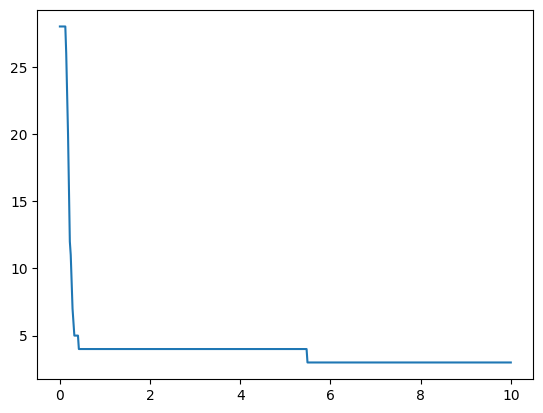

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, Epochs)
ax.plot(x, TotalLoss)    

print(confusion_matrix(output, y))

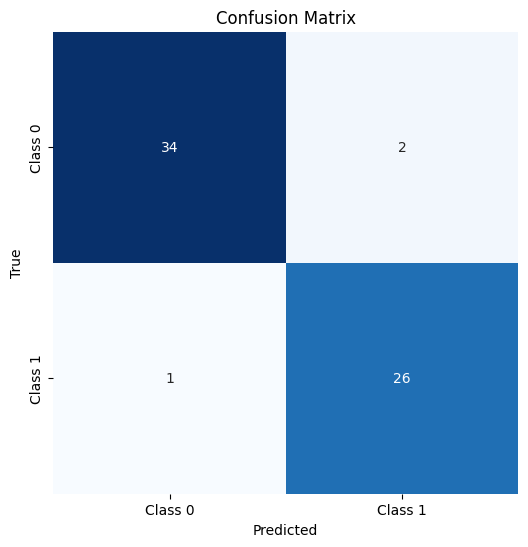

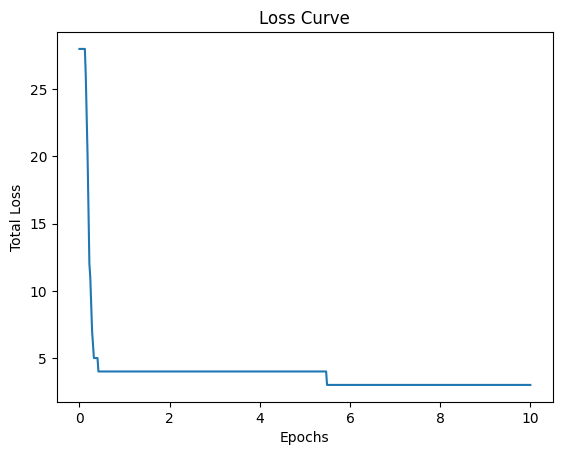

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(output, y)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the loss curve
plt.figure()
plt.plot(np.linspace(0, 10, Epochs), TotalLoss)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss Curve')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(output, y)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9523809523809523
